**Fashion-MNIST - Evrişimli Sinir Ağı** 
---




**Colab** için kimlik doğrulama işlemler...

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
import os

os.chdir('/gdrive/My Drive/NesneTanima/')

In [ ]:
!ls

drive			 ResNet50_NesneTanima_ImageNet.ipynb
Fashion_MNIST_CNN.ipynb  save_models
images			 VGG16_NesneTanima.ipynb




```
# Bu, kod olarak biçimlendirilmiştir
```

### Kütüphane kurulumu

In [ ]:
!pip3 install -q keras

### Fashion MNIST veri setine bir gözatalım!

*   Liste öğesi
*   Liste öğesi




![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

**Gerekli paketler yükleniyor...**

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

**Verileri internet üzerinden çekelim!**

In [ ]:
# Veri setlerini yükleme
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Veriler içinden bir örnek görelim :)

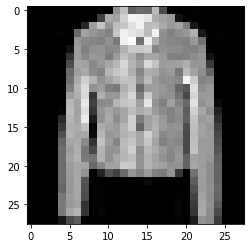

In [ ]:
plt.imshow(x_test[10], cmap='gray')

### 10 sınıftan oluşan Fashion MNIST veri kümesinde hangi sınıflar var bakalım!

In [ ]:
fashion_mnist_labels = np.array([
                                'Tişört/Üst',
                                 'Pantolon',
                                 'Kazak',
                                 'Elbise',
                                 'Ceket',
                                 'Sandalet',
                                 'Gömlek',
                                 'Sneaker',
                                 'Çanta',
                                 'Bilekte Bot'])

**Daha önce eğitilmiş olan modelin ağırlıklarını` model_fashion-mnist_cnn_train2_epoch24.h5`dosyasından çekelim ve giriş görüntülerini model girişine uygun şekilde ön işlemlerden geçirelim!**

In [ ]:
root = '/gdrive/My Drive/NesneTanima/save_models/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')

def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1

NameError: ignored

In [ ]:
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')

Doğru tahminlerin sayısı: 86
Hata sayısı: 14
Doğru tahmin oranı: 86.0 %
